TL;DR - It looks like `IDCK2R1AT0` is v2 and `IDCKZR1AT0` is v1, although when comparing against the data in zv2 the values aren't exactly the same.

In [2]:
import glob

import matplotlib.pyplot as plt
import xarray as xr

In [3]:
csiro_v2_files = [
    '../precip/monthly/IDCK2R1AT0_precip_total_r005_20200101_20200131.nc',
    '../precip/monthly/IDCK2R1AT0_precip_total_r005_20200201_20200229.nc',
    '../precip/monthly/IDCK2R1AT0_precip_total_r005_20200301_20200331.nc',
]

csiro_v1_files = [
    '../precip/monthly/IDCKZR1AT0_precip_total_r005_20200101_20200131.nc',
    '../precip/monthly/IDCKZR1AT0_precip_total_r005_20200201_20200229.nc',
    '../precip/monthly/IDCKZR1AT0_precip_total_r005_20200301_20200331.nc',
]

In [4]:
ds_csiro_v2 = xr.open_mfdataset(csiro_v2_files)

In [5]:
ds_csiro_v2

<xarray.Dataset>
Dimensions:             (time: 3, lat: 691, lon: 886, nv: 2)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-16 2020-02-15 2020-03-16
  * lat                 (lat) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon                 (lon) float32 112.0 112.1 112.1 ... 156.1 156.2 156.2
Dimensions without coordinates: nv
Data variables:
    lat_bnds            (time, lat, nv) float32 dask.array<chunksize=(1, 691, 2), meta=np.ndarray>
    lon_bnds            (time, lon, nv) float32 dask.array<chunksize=(1, 886, 2), meta=np.ndarray>
    time_bnds           (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip              (time, lat, lon) float32 dask.array<chunksize=(1, 691, 886), meta=np.ndarray>
    number_of_stations  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    crs                 (time) int32 -2147483647 -2147483647 -2147483647
Attributes: (12/27)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       2020-01-01T00:00:00
    time_coverage_end:         2020-01-31T00:00:00
    ...                        ...
    url:                       http://www.bom.gov.au/climate/
    licence:                   Copyright for any data supplied by the Bureau ...
    id:                        Australian Gridded Climate Data (AGCD)
    summary:                   The monthly rainfall data represents the amoun...
    institution:               Australian Bureau of Meteorology, GPO Box 1289...
    naming_authority:          au.gov.bom

In [6]:
ds_csiro_v1 = xr.open_mfdataset(csiro_v1_files)
ds_csiro_v1

<xarray.Dataset>
Dimensions:             (time: 3, lat: 691, lon: 886, nv: 2)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-16 2020-02-15 2020-03-16
  * lat                 (lat) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon                 (lon) float32 112.0 112.1 112.1 ... 156.1 156.2 156.2
Dimensions without coordinates: nv
Data variables:
    lat_bnds            (time, lat, nv) float32 dask.array<chunksize=(1, 691, 2), meta=np.ndarray>
    lon_bnds            (time, lon, nv) float32 dask.array<chunksize=(1, 886, 2), meta=np.ndarray>
    time_bnds           (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip              (time, lat, lon) float32 dask.array<chunksize=(1, 691, 886), meta=np.ndarray>
    number_of_stations  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    crs                 (time) int32 -2147483647 -2147483647 -2147483647
Attributes: (12/27)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       2020-01-01T00:00:00
    time_coverage_end:         2020-01-31T00:00:00
    ...                        ...
    url:                       http://www.bom.gov.au/climate/
    licence:                   Copyright for any data supplied by the Bureau ...
    id:                        Australian Gridded Climate Data (AGCD)
    summary:                   The daily and monthly rainfall data represents...
    institution:               Australian Bureau of Meteorology, GPO Box 1289...
    naming_authority:          au.gov.bom

In [7]:
ds_bom_v2 = xr.open_dataset('/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_2020.nc')

In [8]:
ds_bom_v1 = xr.open_dataset('/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_2020.nc')

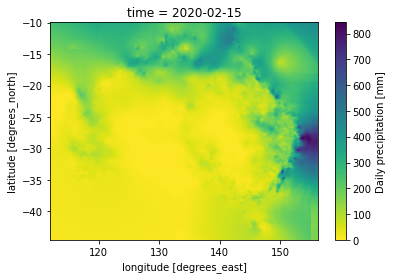

In [9]:
ds_bom_v2['precip'].isel(time=1).plot(cmap='viridis_r')

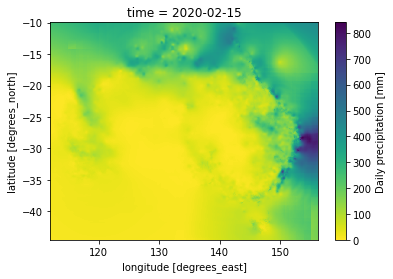

In [10]:
ds_csiro_v2['precip'].isel(time=1).plot(cmap='viridis_r')

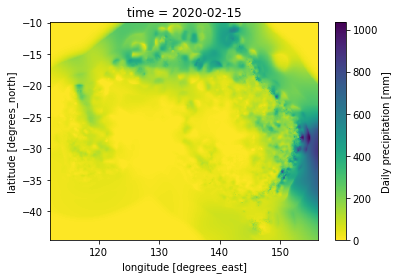

In [11]:
ds_csiro_v1['precip'].isel(time=1).plot(cmap='viridis_r')

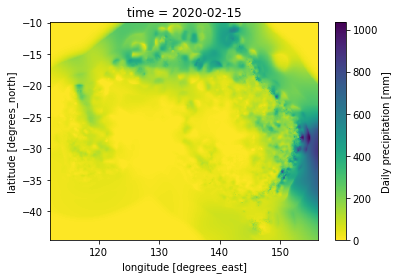

In [13]:
ds_csiro_v1['precip'].isel(time=1).plot(cmap='viridis_r')

In [22]:
ds_bom_v2['precip'].isel(time=1, lat=400, lon=420)

<xarray.DataArray 'precip' ()>
array(12.333008)
Coordinates:
    time     datetime64[ns] 2020-02-15
    lat      float32 -24.5
    lon      float32 133.0
Attributes:
    cell_methods:           time: sum time: sum (interval : 1 day)
    units:                  mm
    long_name:              Daily precipitation
    standard_name:          lwe_thickness_of_precipitation_amount
    frequency:              monthly
    start_offset:           -24
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement
    valid_range:            [     0. 100000.]

In [23]:
ds_bom_v2['precip'].isel(time=1, lat=400, lon=420).values

array(12.33300781)

In [24]:
ds_csiro_v2['precip'].isel(time=1, lat=400, lon=420).values

array(12.60449219)

In [25]:
ds_bom_v1['precip'].isel(time=1, lat=400, lon=420).values

array(18.6171875)

In [26]:
ds_csiro_v1['precip'].isel(time=1, lat=400, lon=420).values

array(18.23730469)